In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
paths = os.listdir('/kaggle/input/synthevox3d/SynthEVox3D-Tiny/event_3d_scan_tiny')
print(paths)

['03691459', '02958343', '04530566', '03001627', '02828884', '04256520', '02691156', '03636649', '03211117', '02933112', '04379243', '04401088', '04090263']


In [ ]:
import os
try:
    os.mkdir('model_data')
    for z in paths:
        os.mkdir(f'model_data/{z}')
except:
    pass


In [ ]:
import os
import numpy as np
def rotate_90_x(voxel):
    # Rotate 90 degrees around the x-axis
    return np.rot90(voxel, axes=(2, 0))
for z in paths:
    path = f'/kaggle/input/synthevox3d/SynthEVox3D-Tiny/event_3d_scan_tiny/{z}/'
    Main_path = os.listdir(path)
    model_array = []
    model_array90 = []
    Object = 'model_normalized.npz'
    for i in Main_path:

        obect_path = (path + i +'/')
        Data = np.load(obect_path + Object)['arr_0']
        Data = rotate_90_x(Data)
        model_array.append(Data)
        model_array90.append(np.rot90(Data, 2))
        
    np.save(f'model_data/{z}/model_array.npy', model_array)
    np.save(f'model_data/{z}/model_array90.npy', model_array90)

In [5]:
!zip -rq file.zip /kaggle/working

In [6]:
import os
paths = os.listdir('/kaggle/input/synthevox3d/SynthEVox3D-Tiny/event_3d_scan_tiny')
print(paths)

['03691459', '02958343', '04530566', '03001627', '02828884', '04256520', '02691156', '03636649', '03211117', '02933112', '04379243', '04401088', '04090263']


# Visualising

03691459


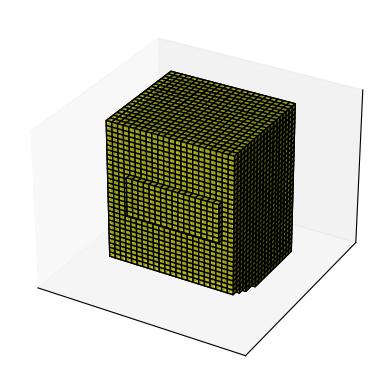

02958343


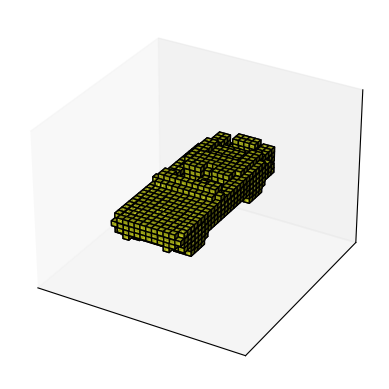

04530566


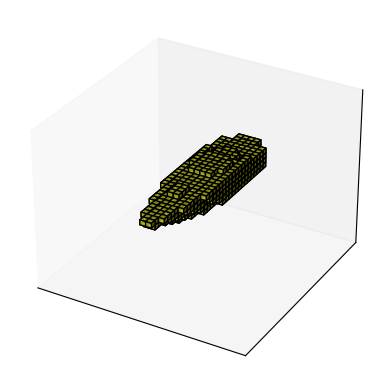

03001627


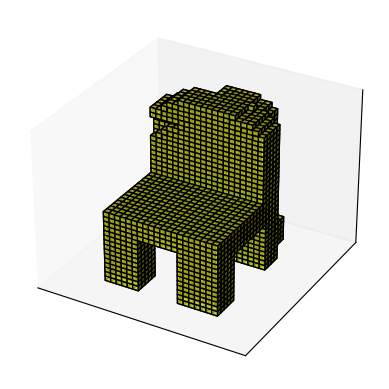

02828884


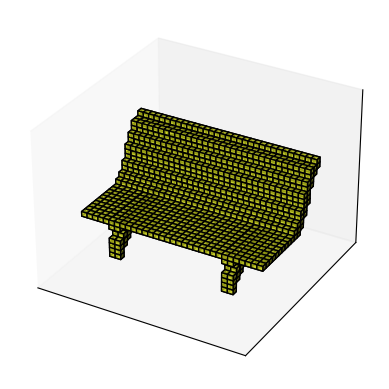

04256520


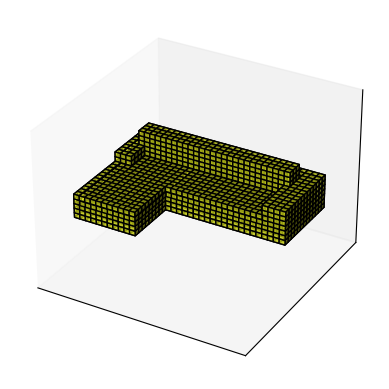

02691156


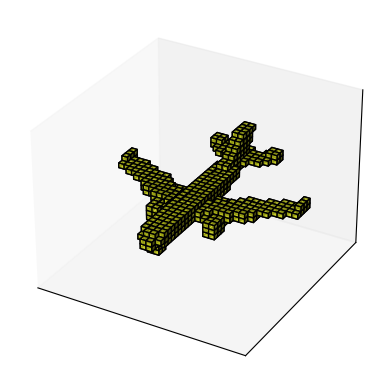

03636649


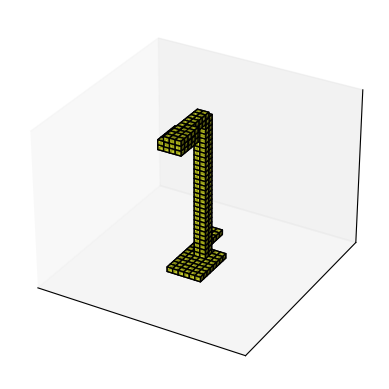

03211117


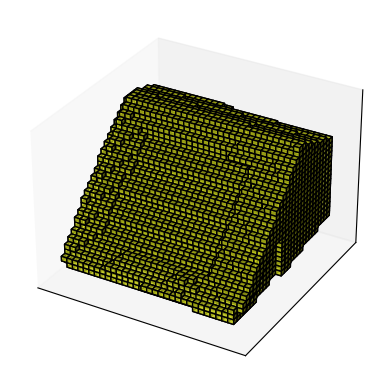

02933112


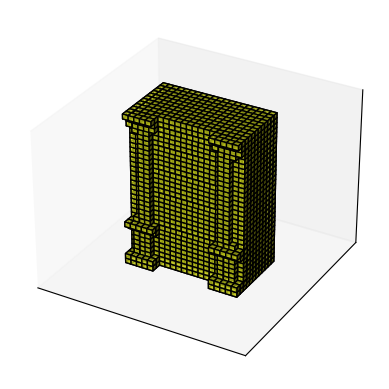

04379243


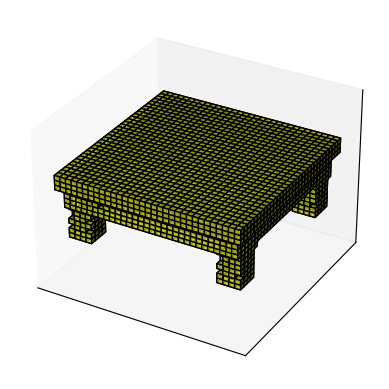

04401088


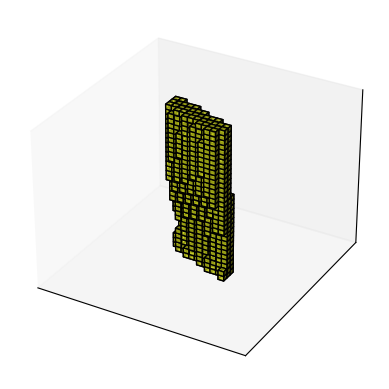

04090263


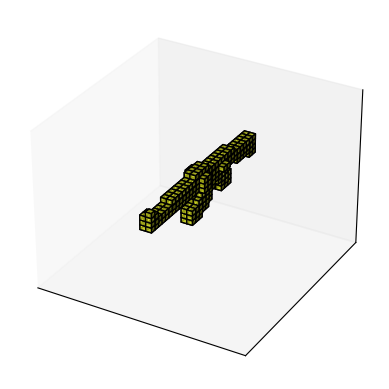

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Assuming Items is a list of 3D voxel arrays
for i in paths:
    Items = np.load(f'/kaggle/working/model_data/{i}/model_array.npy')
    dataone = Items[5]
    dataone = (dataone)
    
    # Normalize data to [0, 1] range and apply a colormap
    colormap = plt.cm.plasma  # You can choose different colormaps like 'plasma', 'magma', etc.
    colors = colormap(dataone / np.max(dataone))  # Normalize data to [0, 1] range
    
    # Create a 3D plot for the voxels
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    print(f"{i}")
    # Plot the voxels with color mapping and edges
    ax.voxels(dataone, facecolors=colors, edgecolor='k', alpha=0.7)
    ax.grid(False)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_zticks([])  # Remove z-axis ticks
    
    plt.show()
